# Neural Networks and Deep Learning Spring 1400 <img src = 'https://ece.ut.ac.ir/cict-theme/images/footer-logo.png' alt="Tehran-University-Logo" width="150" height="150" align="right">
## Homework 2 - Question 3 - Part 2
### By Omid Vaheb

## Importing

In [140]:
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import itertools
from sklearn.metrics import confusion_matrix , classification_report
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import time
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Reading CSV file

In [141]:
dataframe = pd.read_csv('/content/drive/My Drive/sonar.all-data.csv')

## Observing Dataset

In [142]:
x = dataframe.drop('Class', inplace=False, axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataframe2 = pd.DataFrame(x_scaled)
dataframe2['Class'] = dataframe['Class']
dataframe = dataframe2

In [143]:
X = dataframe.drop('Class', inplace = False, axis = 1)
y = dataframe['Class']
temp = []
for i in range(len(y)):
    if y[i] == 'R':
        temp.append(1)
    else:
        temp.append(0)
y = temp
y = pd.Series(y)

## Train and Test Spliting

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7)

# Best Model in the Previous Question

## Preprocess

In [145]:
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (166, 60) (166,)
Testing data shape :  (42, 60) (42,)


In [146]:
t = time.time()

In [147]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [148]:
model = Sequential()
model.add(Dense(200, activation = 'relu', input_shape = (60,)))
model.add(Dense(450, activation = 'relu'))
model.add(Dense(400, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 200)               12200     
_________________________________________________________________
dense_91 (Dense)             (None, 450)               90450     
_________________________________________________________________
dense_92 (Dense)             (None, 400)               180400    
_________________________________________________________________
dense_93 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_94 (Dense)             (None, 2)                 202       
Total params: 323,352
Trainable params: 323,352
Non-trainable params: 0
_________________________________________________________________


In [149]:
history = model.fit(X_train, Y_train, epochs = 30, batch_size = 32, validation_split = 0.2)

Epoch 1/30
5/5 [==============================] - 1s 74ms/step - loss: 0.6738 - accuracy: 0.5696 - val_loss: 0.6127 - val_accuracy: 0.7353
Epoch 2/30
5/5 [==============================] - 0s 11ms/step - loss: 0.6163 - accuracy: 0.6847 - val_loss: 0.5803 - val_accuracy: 0.6765
Epoch 3/30
5/5 [==============================] - 0s 13ms/step - loss: 0.5359 - accuracy: 0.7623 - val_loss: 0.5958 - val_accuracy: 0.7059
Epoch 4/30
5/5 [==============================] - 0s 10ms/step - loss: 0.5105 - accuracy: 0.7498 - val_loss: 0.6006 - val_accuracy: 0.7059
Epoch 5/30
5/5 [==============================] - 0s 11ms/step - loss: 0.4670 - accuracy: 0.7122 - val_loss: 0.5264 - val_accuracy: 0.7059
Epoch 6/30
5/5 [==============================] - 0s 11ms/step - loss: 0.3889 - accuracy: 0.8518 - val_loss: 0.4491 - val_accuracy: 0.7353
Epoch 7/30
5/5 [==============================] - 0s 11ms/step - loss: 0.3179 - accuracy: 0.8573 - val_loss: 0.4327 - val_accuracy: 0.8529
Epoch 8/30
5/5 [===========

In [150]:
elapsed = time.time() - t

In [151]:
print('Elapsed Time : ', elapsed)

Elapsed Time :  2.5207931995391846


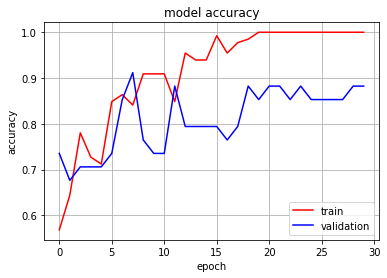

In [152]:
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

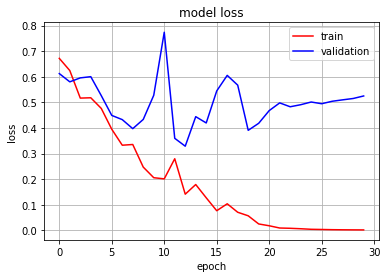

In [153]:
fig = plt.figure()
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.grid()

In [154]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 5ms/step - loss: 0.6159 - accuracy: 0.8571
Test Loss 0.6158812642097473
Test Accuracy 0.8571428656578064


In [155]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[22  5]
 [ 1 14]]


# Second Model Using PCA

## Preprocess

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7)

In [157]:
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (166, 60) (166,)
Testing data shape :  (42, 60) (42,)


In [158]:
t = time.time()

In [159]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [160]:
pca = PCA(.95)
pca.fit(X_train)
pca.n_components_

27

In [161]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

## Model

In [162]:
model = Sequential()
model.add(Dense(200, activation = 'relu', input_shape = (27,)))
model.add(Dense(450, activation = 'relu'))
model.add(Dense(400, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 200)               5600      
_________________________________________________________________
dense_96 (Dense)             (None, 450)               90450     
_________________________________________________________________
dense_97 (Dense)             (None, 400)               180400    
_________________________________________________________________
dense_98 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_99 (Dense)             (None, 2)                 202       
Total params: 316,752
Trainable params: 316,752
Non-trainable params: 0
_________________________________________________________________


In [163]:
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
5/5 [==============================] - 1s 45ms/step - loss: 0.6787 - accuracy: 0.5344 - val_loss: 0.6027 - val_accuracy: 0.7647
Epoch 2/10
5/5 [==============================] - 0s 13ms/step - loss: 0.5535 - accuracy: 0.8792 - val_loss: 0.4743 - val_accuracy: 0.8235
Epoch 3/10
5/5 [==============================] - 0s 12ms/step - loss: 0.3768 - accuracy: 0.8954 - val_loss: 0.4487 - val_accuracy: 0.7941
Epoch 4/10
5/5 [==============================] - 0s 12ms/step - loss: 0.2189 - accuracy: 0.9405 - val_loss: 0.4906 - val_accuracy: 0.7941
Epoch 5/10
5/5 [==============================] - 0s 12ms/step - loss: 0.1377 - accuracy: 0.9554 - val_loss: 0.5107 - val_accuracy: 0.8235
Epoch 6/10
5/5 [==============================] - 0s 12ms/step - loss: 0.0828 - accuracy: 0.9785 - val_loss: 0.6693 - val_accuracy: 0.7647
Epoch 7/10
5/5 [==============================] - 0s 12ms/step - loss: 0.0459 - accuracy: 0.9944 - val_loss: 0.7772 - val_accuracy: 0.7941
Epoch 8/10
5/5 [===========

In [164]:
elapsed = time.time() - t

In [165]:
print('Elapsed Time : ', elapsed)

Elapsed Time :  1.324458122253418


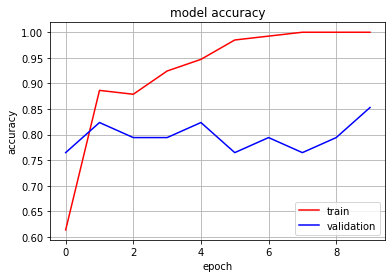

In [166]:
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

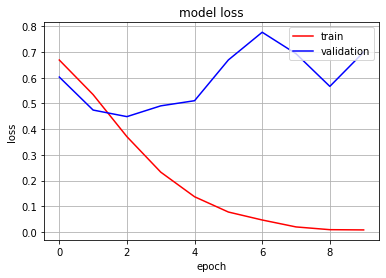

In [167]:
fig = plt.figure()
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.grid()

In [168]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 7ms/step - loss: 0.7445 - accuracy: 0.8571
Test Loss 0.7445240020751953
Test Accuracy 0.8571428656578064


In [169]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[24  3]
 [ 3 12]]


# Third Model Using Auto-encoder

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7)

In [333]:
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (166, 60) (166,)
Testing data shape :  (42, 60) (42,)


In [334]:
t = time.time()

In [335]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [336]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [337]:
n_inputs = 60
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# bottleneck
n_bottleneck = round(float(n_inputs) / 6.0)
bottleneck = Dense(n_bottleneck)(e)

In [338]:
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)

In [339]:
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [340]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=100, batch_size=16, verbose=2, validation_data=(X_test,X_test))

Epoch 1/100
11/11 - 1s - loss: 0.6739 - val_loss: 0.1836
Epoch 2/100
11/11 - 0s - loss: 0.2694 - val_loss: 0.1565
Epoch 3/100
11/11 - 0s - loss: 0.1322 - val_loss: 0.1402
Epoch 4/100
11/11 - 0s - loss: 0.0839 - val_loss: 0.1274
Epoch 5/100
11/11 - 0s - loss: 0.0642 - val_loss: 0.1175
Epoch 6/100
11/11 - 0s - loss: 0.0563 - val_loss: 0.1131
Epoch 7/100
11/11 - 0s - loss: 0.0509 - val_loss: 0.1038
Epoch 8/100
11/11 - 0s - loss: 0.0478 - val_loss: 0.0967
Epoch 9/100
11/11 - 0s - loss: 0.0424 - val_loss: 0.0905
Epoch 10/100
11/11 - 0s - loss: 0.0385 - val_loss: 0.0829
Epoch 11/100
11/11 - 0s - loss: 0.0367 - val_loss: 0.0768
Epoch 12/100
11/11 - 0s - loss: 0.0349 - val_loss: 0.0717
Epoch 13/100
11/11 - 0s - loss: 0.0348 - val_loss: 0.0647
Epoch 14/100
11/11 - 0s - loss: 0.0305 - val_loss: 0.0599
Epoch 15/100
11/11 - 0s - loss: 0.0314 - val_loss: 0.0538
Epoch 16/100
11/11 - 0s - loss: 0.0296 - val_loss: 0.0511
Epoch 17/100
11/11 - 0s - loss: 0.0299 - val_loss: 0.0474
Epoch 18/100
11/11 - 0s

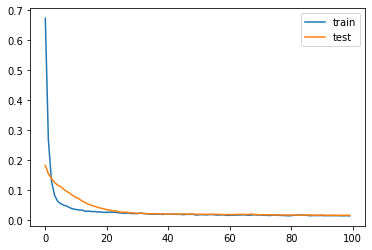

In [341]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [342]:
encoder = Model(inputs=visible, outputs=bottleneck)

In [343]:
# encode the train data
X_train_encoded = encoder.predict(X_train)
# encode the test data
X_test_encoded = encoder.predict(X_test)

In [344]:
model = Sequential()
model.add(Dense(200, activation = 'relu', input_shape = (10,)))
model.add(Dense(450, activation = 'relu'))
model.add(Dense(400, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_215 (Dense)            (None, 200)               2200      
_________________________________________________________________
dense_216 (Dense)            (None, 450)               90450     
_________________________________________________________________
dense_217 (Dense)            (None, 400)               180400    
_________________________________________________________________
dense_218 (Dense)            (None, 100)               40100     
_________________________________________________________________
dense_219 (Dense)            (None, 2)                 202       
Total params: 313,352
Trainable params: 313,352
Non-trainable params: 0
_________________________________________________________________


In [345]:
history = model.fit(X_train_encoded, Y_train, epochs = 20, batch_size = 32, validation_split = 0.2)

Epoch 1/20
5/5 [==============================] - 1s 50ms/step - loss: 0.6618 - accuracy: 0.5589 - val_loss: 0.4685 - val_accuracy: 0.8235
Epoch 2/20
5/5 [==============================] - 0s 12ms/step - loss: 0.4955 - accuracy: 0.7410 - val_loss: 0.4044 - val_accuracy: 0.8824
Epoch 3/20
5/5 [==============================] - 0s 12ms/step - loss: 0.3923 - accuracy: 0.8171 - val_loss: 0.4068 - val_accuracy: 0.8235
Epoch 4/20
5/5 [==============================] - 0s 11ms/step - loss: 0.3378 - accuracy: 0.8537 - val_loss: 0.4153 - val_accuracy: 0.7941
Epoch 5/20
5/5 [==============================] - 0s 13ms/step - loss: 0.3046 - accuracy: 0.8400 - val_loss: 0.3605 - val_accuracy: 0.8235
Epoch 6/20
5/5 [==============================] - 0s 12ms/step - loss: 0.2771 - accuracy: 0.9025 - val_loss: 0.3606 - val_accuracy: 0.7647
Epoch 7/20
5/5 [==============================] - 0s 11ms/step - loss: 0.2390 - accuracy: 0.8773 - val_loss: 0.3293 - val_accuracy: 0.8235
Epoch 8/20
5/5 [===========

In [346]:
elapsed = time.time() - t

In [347]:
print('Elapsed Time : ', elapsed)

Elapsed Time :  9.07685375213623


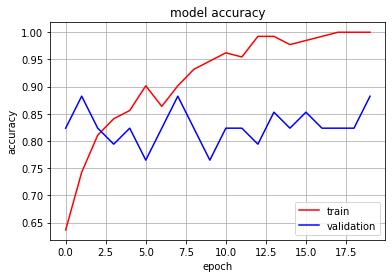

In [348]:
fig = plt.figure()
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

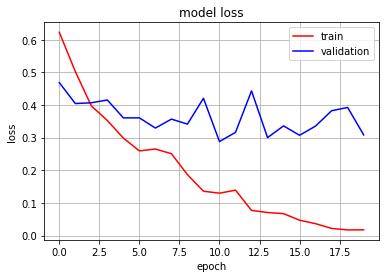

In [349]:
fig = plt.figure()
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.grid()

In [350]:
Y_pred = model.predict(X_test_encoded)
y_pred = np.argmax(Y_pred, axis = 1)
[test_loss, test_acc] = model.evaluate(X_test_encoded, Y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

2/2 [==============================] - 0s 4ms/step - loss: 0.8089 - accuracy: 0.8333
Test Loss 0.8088808655738831
Test Accuracy 0.8333333134651184


In [351]:
class_names = [0, 1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[24  3]
 [ 4 11]]
